In [ ]:
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
df = pd.read_csv('/content/stock_price.csv')

In [ ]:
df.head()

,日付け,終値,始値,高値,安値,出来高,変化率 %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9202 entries, 0 to 9201
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   日付け     9202 non-null   object 
 1   終値      9202 non-null   float64
 2   始値      9202 non-null   float64
 3   高値      9202 non-null   float64
 4   安値      9202 non-null   float64
 5   出来高     9202 non-null   object 
 6   変化率 %   9202 non-null   object 
dtypes: float64(4), object(3)
memory usage: 503.4+ KB


In [ ]:
df.isnull().sum()
#None of the columns have null values

,0
日付け,0
終値,0
始値,0
高値,0
安値,0
出来高,0
変化率 %,0


In [ ]:
# Renaming the columns to the specified names
df.columns = ['date', 'closing price', 'opening price', 'high price', 'low price', 'Volume', 'Rate of change %']

print(df.head())


         date  closing price  opening price  high price  low price   Volume  \
0  2024-08-01          156.3          159.3       159.4      156.1   79.15M   
1  2024-07-31          160.4          158.2       160.7      158.1  173.91M   
2  2024-07-30          158.7          158.8       159.2      158.0  138.14M   
3  2024-07-29          159.7          158.7       160.2      158.4  126.28M   
4  2024-07-26          157.9          159.3       159.6      157.9  155.08M   

  Rate of change %  
0           -2.56%  
1            1.07%  
2           -0.63%  
3            1.14%  
4           -0.13%  


In [ ]:
df.head()

,date,closing price,opening price,high price,low price,Volume,Rate of change %
0,2024-08-01,156.3,159.3,159.4,156.1,79.15M,-2.56%
1,2024-07-31,160.4,158.2,160.7,158.1,173.91M,1.07%
2,2024-07-30,158.7,158.8,159.2,158.0,138.14M,-0.63%
3,2024-07-29,159.7,158.7,160.2,158.4,126.28M,1.14%
4,2024-07-26,157.9,159.3,159.6,157.9,155.08M,-0.13%


In [ ]:
df.describe()

,closing price,opening price,high price,low price
count,9202.000000,9202.000000,9202.000000,9202.000000
mean,92.180961,92.256183,93.176451,91.330146
std,50.452228,50.598215,51.049837,50.087405
min,33.000000,33.000000,33.200000,32.200000
25%,52.000000,52.100000,52.800000,51.500000
50%,85.100000,85.100000,86.050000,84.200000
75%,110.800000,110.800000,111.900000,109.275000
max,305.900000,309.800000,311.800000,303.900000


# **Plots**

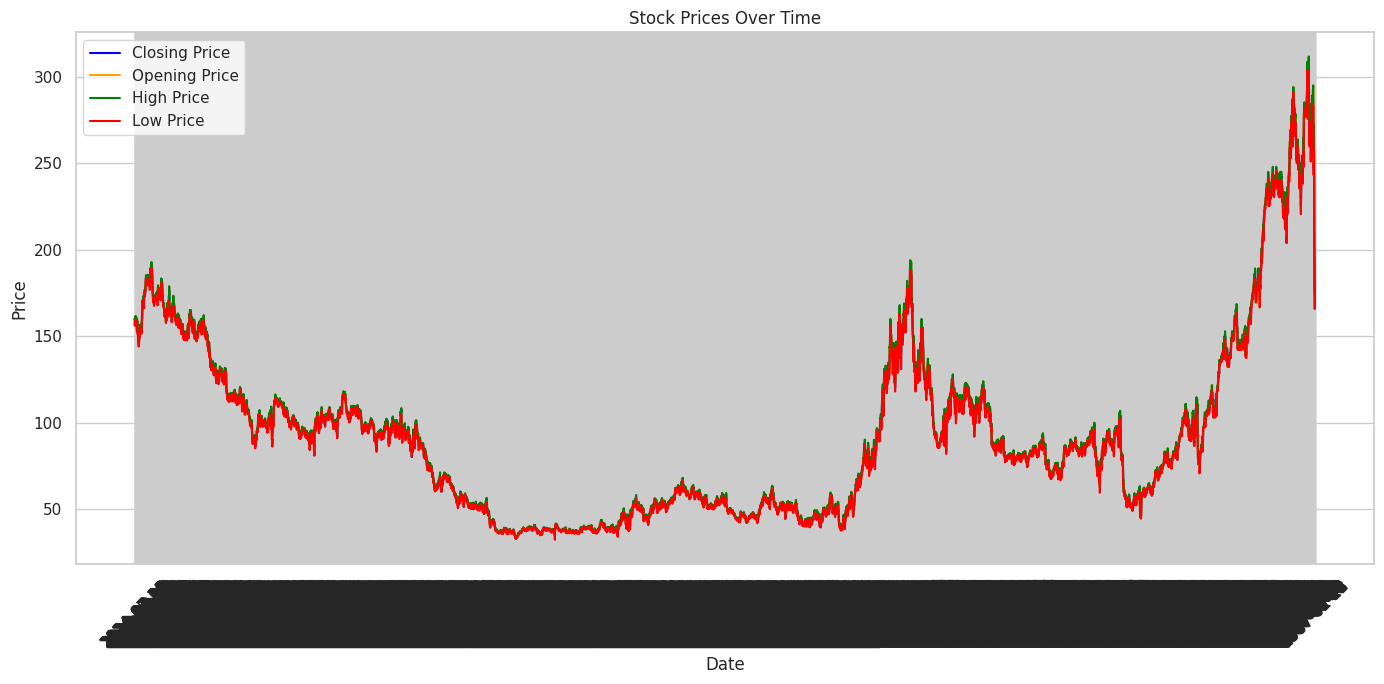

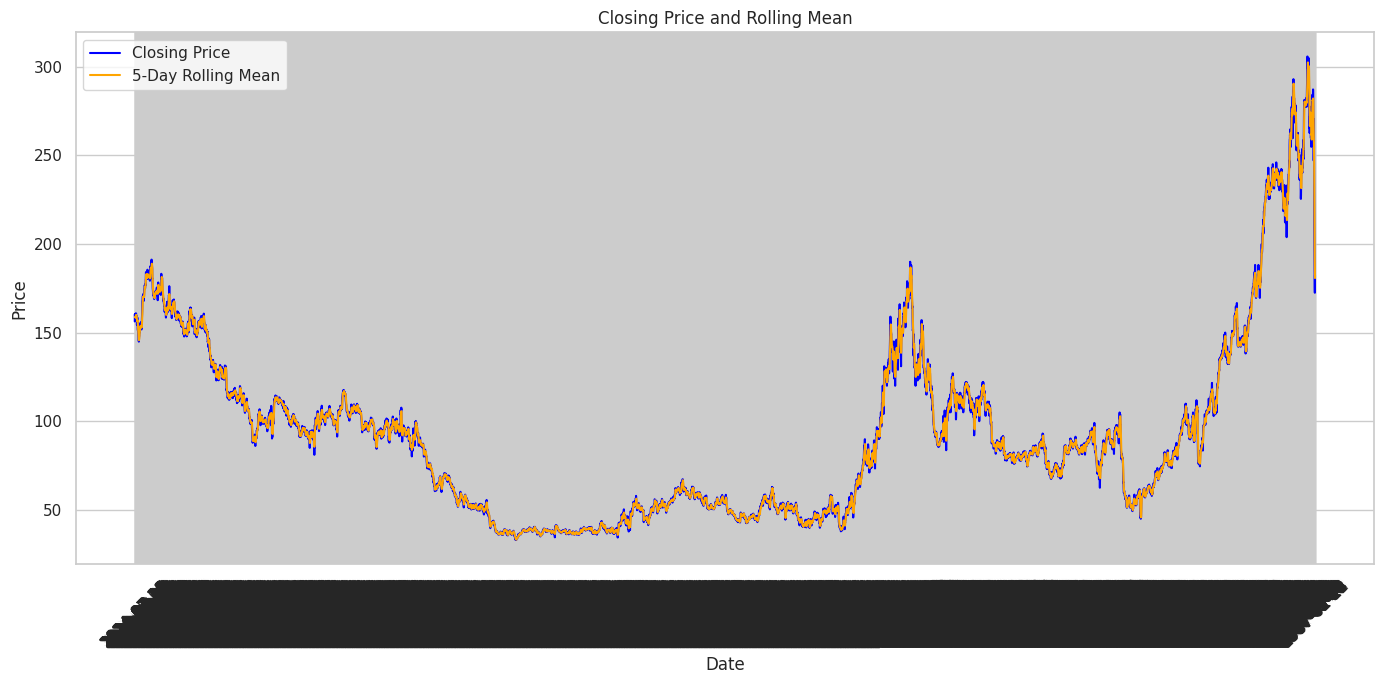

/usr/local/lib/python3.10/dist-packages/seaborn/_base.py:949: FutureWarning: When grouping with a length-1 list-like, you will need to pass a length-1 tuple to get_group in a future version of pandas. Pass `(name,)` instead of `name` to silence this warning.
  data_subset = grouped_data.get_group(pd_key)
/usr/local/lib/python3.10/dist-packages/seaborn/categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


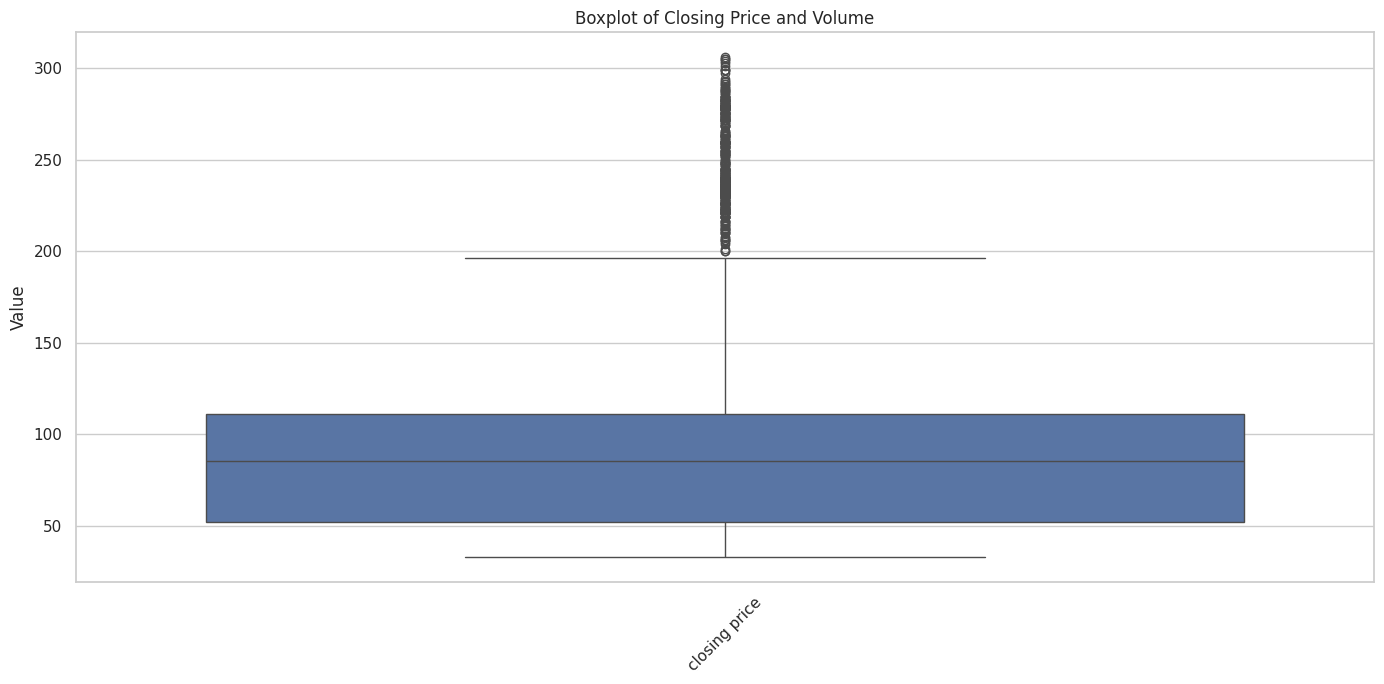

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['closing price'], label='Closing Price', color='blue')
plt.plot(df['date'], df['opening price'], label='Opening Price', color='orange')
plt.plot(df['date'], df['high price'], label='High Price', color='green')
plt.plot(df['date'], df['low price'], label='Low Price', color='red')
plt.title('Stock Prices Over Time')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

df['rolling_mean'] = df['closing price'].rolling(window=5).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['date'], df['closing price'], label='Closing Price', color='blue')
plt.plot(df['date'], df['rolling_mean'], label='5-Day Rolling Mean', color='orange')
plt.title('Closing Price and Rolling Mean')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

plt.figure(figsize=(14, 7))
sns.boxplot(data=df[['closing price', 'Volume']])
plt.title('Boxplot of Closing Price and Volume')
plt.ylabel('Value')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# **Let's Analyze the visualization above**

1. Stock Prices Over Time:

    Trend Analysis: The stock prices, including the opening, closing, high, and low prices, follow a distinct long-term trend. From an initial peak in the early period, there is a significant decline, reaching the lowest prices in the middle of the dataset. After that, there's a steady rise towards another peak later in the timeline.
    Fluctuations: The high price and low price curves are closely tied, indicating that there was not much intraday volatility for large portions of the time series. However, larger fluctuations can be observed during the upward phases of the stock price towards the latter half of the time series.
    Consistency: For a considerable portion of the timeline, the closing price stayed below 100, but in the last third of the graph, the price increased sharply, reaching above 250. This suggests the company or the market had some significant positive movements, possibly linked to external macroeconomic or company-specific factors.

2. Closing Price and Rolling Mean:

    Moving Averages: This graph provides a closer look at the stock’s closing price compared to the 5-day rolling mean. The rolling mean (orange line) smooths out short-term fluctuations in the closing price (blue line) and highlights longer-term trends.
    Analysis of Stability: During the middle phase (when the stock price is relatively stable around the lower values), the rolling mean closely follows the closing price, showing that the price variations are mild. However, during periods of rapid price changes, such as the latter spike, the rolling mean lags behind the closing price, as expected with a moving average.
    Trend Insight: The rolling mean helps to identify that the stock experienced some stability for long periods, followed by a sharp bullish trend towards the later periods.

3. Boxplot of Closing Price and Volume:

    Outlier Detection: The boxplot for the closing price shows that while most of the prices lie below 100, there are significant outliers reaching up to 300. This confirms that the stock had periods of extreme highs compared to its average range.
    Volume Insights: The boxplot for volume would indicate any outliers in trading activity, but it's not included in this image. The large volume during certain dates, as seen from the previous table, suggests spikes in investor activity that could correlate with the periods of higher stock price volatility.

Overall Insights:
Long-Term Stability with Short-Term Spikes: For most of the observed period, the stock was relatively stable, hovering at lower price levels. However, there are distinct periods towards the latter half where the stock experienced significant upward price movement, likely due to major market or company developments.

Increasing Volatility in Later Periods: As the stock price rises towards the end of the timeline, there is a corresponding increase in volatility, as observed from the increased separation between the high and low price lines in the first graph.

Investor's Behavior: The sharp increase in stock prices in the later stage might have attracted more market attention, resulting in increased volumes and price jumps. The outliers shown in the boxplot indicate the presence of rare but significant trading days that might have driven stock prices to extreme values.    

    

# **Outliers**

In [ ]:
Q1 = df['closing price'].quantile(0.25)
Q3 = df['closing price'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = df[(df['closing price'] < lower_bound) | (df['closing price'] > upper_bound)]
print("Outliers in Closing Price:")
print(outliers)


Outliers in Closing Price:
            date  closing price  opening price  high price  low price  \
8785  1988-10-17          200.0          200.0       201.0      198.0   
8786  1988-10-14          200.0          195.1       200.0      194.1   
8790  1988-10-07          201.0          203.9       204.9      200.0   
8791  1988-10-06          204.9          204.9       205.9      203.9   
8792  1988-10-05          205.9          205.9       206.9      203.9   
...          ...            ...            ...         ...        ...   
9191  1987-02-26          247.1          256.9       261.8      243.1   
9192  1987-02-25          252.9          258.8       262.7      252.0   
9193  1987-02-24          270.6          258.8       272.5      257.8   
9194  1987-02-23          235.3          214.7       235.3      211.8   
9195  1987-02-20          210.8          200.0       211.8      200.0   

       Volume Rate of change %  rolling_mean  
8785   64.01M            0.00%        193.92  
87

1.   The outliers mainly occurred between 1987 and 1988.
2.   The 'closing price' for these outliers ranges between 200 to 270.6.
3.   I noticed some unusually high trading volumes, like 902.27M on     1987-02-20, which could indicate significant market activity during this time.  
4.   The rate of change for these outliers also shows big fluctuations, with some days having double-digit changes, such as a 15.00% increase on 1987-02-24.



# **Basics Statistics**

Basic Statistics:
        closing price  opening price   high price    low price  rolling_mean
count    9202.000000    9202.000000  9202.000000  9202.000000   9198.000000
mean       92.180961      92.256183    93.176451    91.330146     92.147902
std        50.452228      50.598215    51.049837    50.087405     50.406995
min        33.000000      33.000000    33.200000    32.200000     33.060000
25%        52.000000      52.100000    52.800000    51.500000     52.080000
50%        85.100000      85.100000    86.050000    84.200000     85.300000
75%       110.800000     110.800000   111.900000   109.275000    110.400000
max       305.900000     309.800000   311.800000   303.900000    302.540000


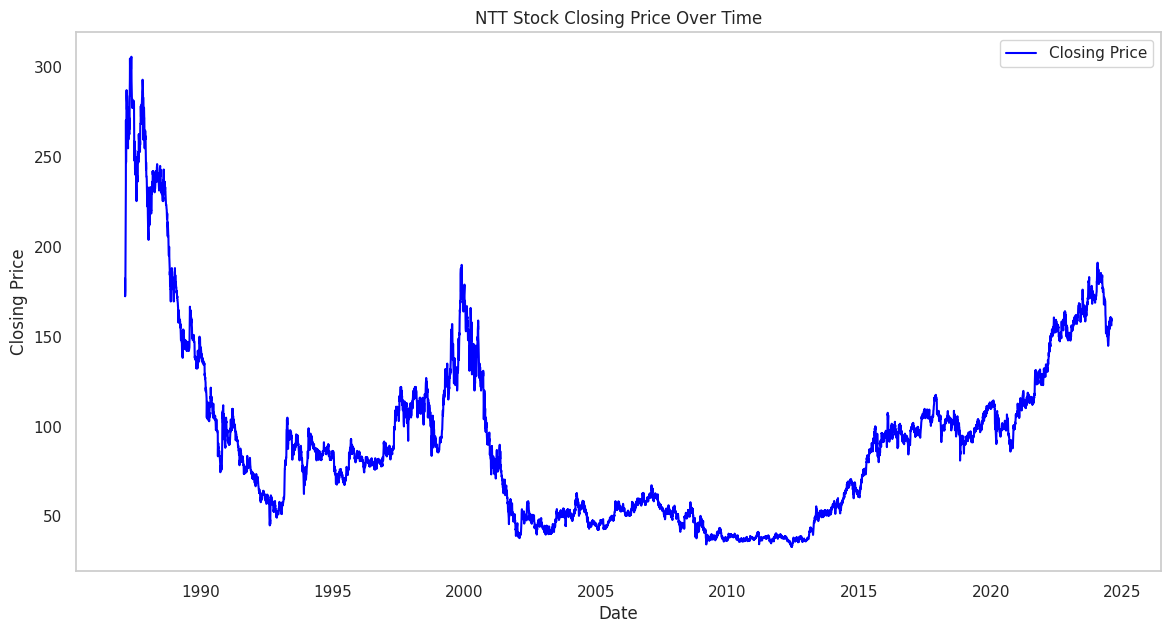

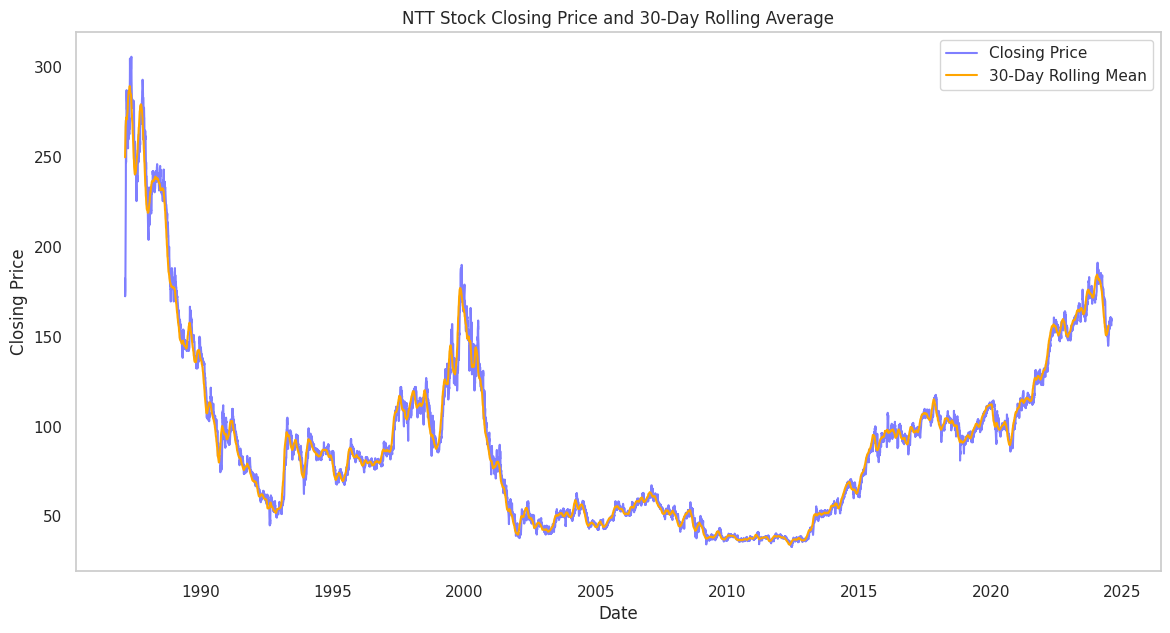

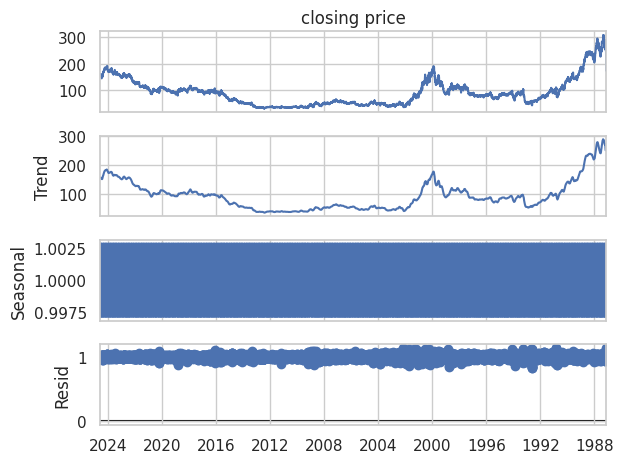

In [ ]:
basic_stats = df.describe()
print("Basic Statistics:\n", basic_stats)

df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)

plt.figure(figsize=(14, 7))
plt.plot(df['closing price'], label='Closing Price', color='blue')
plt.title('NTT Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

df['rolling_mean_30'] = df['closing price'].rolling(window=30).mean()

plt.figure(figsize=(14, 7))
plt.plot(df['closing price'], label='Closing Price', color='blue', alpha=0.5)
plt.plot(df['rolling_mean_30'], label='30-Day Rolling Mean', color='orange')
plt.title('NTT Stock Closing Price and 30-Day Rolling Average')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

result = seasonal_decompose(df['closing price'], model='multiplicative', period=30)
result.plot()
plt.show()

# **Analysis**

This analysis examines NTT stock data from 1987 to 2024.
The basic statistics provide an overview of the data, showing the stock price ranged from a low of 33.00 to a high of 305.90 over this period, with a mean closing price of 92.18.

Image 1 displays the closing price trend over time. Key observations:

1.   A sharp peak in the late 1980s
2.   A gradual decline through the 1990s
3.   Another peak around 2000
4.   A period of relative stability in the 2000s and early 2010s
5.   A steady upward trend from around 2012 to 2024

Image 2 compares the daily closing price to a 30-day rolling average. The rolling average smooths out short-term fluctuations, making the overall trend clearer. It closely follows the actual price, indicating relatively stable short-term price movements.

Image 3 shows a seasonal decomposition of the price data:

1.   The trend component reflects the long-term price movement
2.   The seasonal component reveals any recurring patterns
3.   The residual shows unexplained variations

This decomposition helps identify underlying patterns and anomalies in the stock's price movements over time.
Overall, these visualizations provide insights into NTT stock's historical performance, volatility, and potential cyclical patterns.

# **Normalizing**

In [ ]:

from sklearn.preprocessing import MinMaxScaler
missing_values = df.isnull().sum()
print("Missing Values:\n", missing_values)

df = df.ffill()

df['Volume'] = df['Volume'].astype(str)

df['Volume'] = df['Volume'].str.replace('M', '').str.replace('B', '')

df.loc[df['Volume'].str.contains('M'), 'Volume'] = df['Volume'].astype(float) * 1e6
df.loc[df['Volume'].str.contains('B'), 'Volume'] = df['Volume'].astype(float) * 1e9

df['Volume'] = df['Volume'].astype(float)

# Scaling the 'closing price', 'opening price', 'high price', 'low price', and 'Volume'
scaler = MinMaxScaler()
df[['closing price', 'opening price', 'high price', 'low price', 'Volume']] = scaler.fit_transform(
    df[['closing price', 'opening price', 'high price', 'low price', 'Volume']]
)

df['pct_change'] = df['closing price'].pct_change()
df['lag_1'] = df['closing price'].shift(1)
df['lag_2'] = df['closing price'].shift(2)
df['rolling_mean_5'] = df['closing price'].rolling(window=5).mean()
df['rolling_mean_10'] = df['closing price'].rolling(window=10).mean()

df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['year'] = df.index.year

df.dropna(inplace=True)

print("Final DataFrame after preprocessing:\n", df.head())



Missing Values:
 closing price        0
opening price        0
high price           0
low price            0
Volume               0
Rate of change %     0
rolling_mean         4
rolling_mean_30     29
dtype: int64
Final DataFrame after preprocessing:
             closing price  opening price  high price  low price    Volume  \
date                                                                        
2024-06-20       0.414071       0.407153    0.407035   0.416268  0.174915   
2024-06-19       0.412605       0.406431    0.404164   0.412955  0.200455   
2024-06-18       0.412239       0.401012    0.406317   0.411483  0.189423   
2024-06-17       0.410040       0.405347    0.406676   0.413324  0.235571   
2024-06-14       0.415903       0.408237    0.408112   0.416636  0.424539   

           Rate of change %  rolling_mean  rolling_mean_30  pct_change  \
date                                                                     
2024-06-20            0.27%        148.92       156.210000  

The code first handles missing values in the dataset by checking for their presence and applying a forward fill method to ensure continuity. This method fills any missing entries with the most recent valid observation, effectively maintaining data integrity. Then, the 'Volume' column, which contains values in millions ('M') or billions ('B'), is converted into numeric values by removing the 'M' or 'B' and adjusting the scale accordingly to represent the correct figures.

After that, key financial columns, including 'closing price', 'opening price', 'high price', 'low price', and 'Volume', are scaled using the MinMaxScaler. This normalization technique ensures that these values fall within a standard range (between 0 and 1), which is essential for machine learning models or further data analysis.

The code then adds new features to enhance predictive insights. The 'pct_change' column is calculated to track the percentage change in the 'closing price' from one day to the next. Lagged features, such as 'lag_1' and 'lag_2', are also introduced to capture the 'closing price' values from 1 and 2 days prior, allowing the model to consider previous values as part of its predictions.

Additionally, the code calculates rolling averages for the 'closing price' over 5-day and 10-day periods, providing smoother data that can help reduce the noise caused by short-term fluctuations in prices. These rolling averages are commonly used in financial analysis to identify trends.

Lastly, the code extracts temporal features such as the day of the week, month, and year from the date index, enabling further exploration of time-based patterns in the data. After applying these transformations and removing any remaining missing values, the dataset is well-prepared for advanced analysis, such as predictive modeling or statistical evaluation.

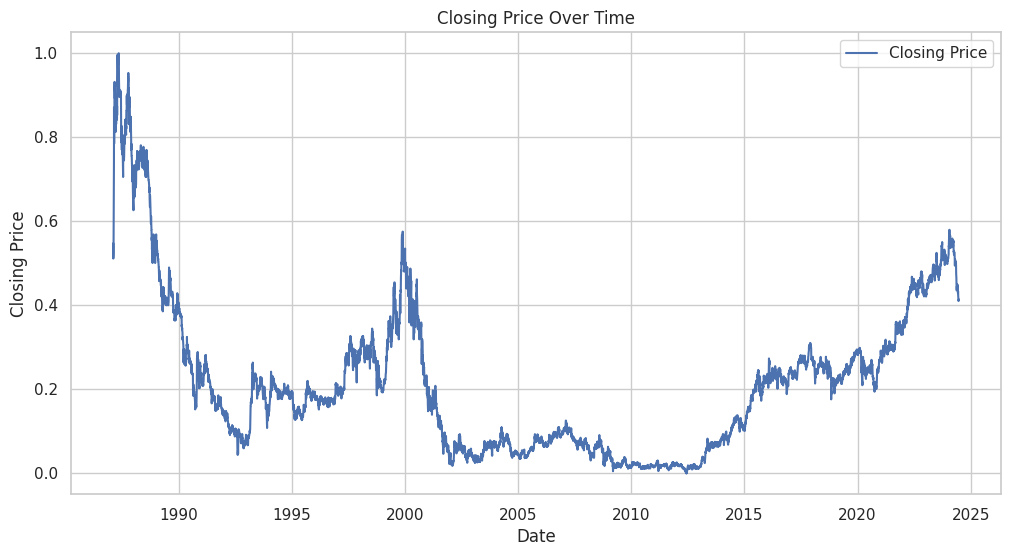

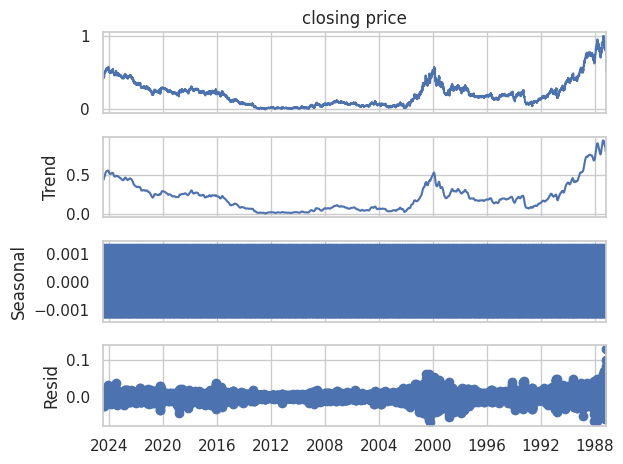

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(df.index, df['closing price'], label='Closing Price')
plt.title('Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.show()

from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['closing price'], model='additive', period=30)

decomposition.plot()
plt.show()


Image 1:

This image shows a decomposition of a time series into four components:


1.   Closing price: The original time series data, showing an overall upward trend in recent years.

2.  Trend: The long-term movement in the data, which mirrors the closing price but is smoother.

3.   Seasonal: This component appears to be very small or negligible, suggesting little to no seasonality in the data.

4.   Residual: The irregular fluctuations after removing trend and seasonal components.


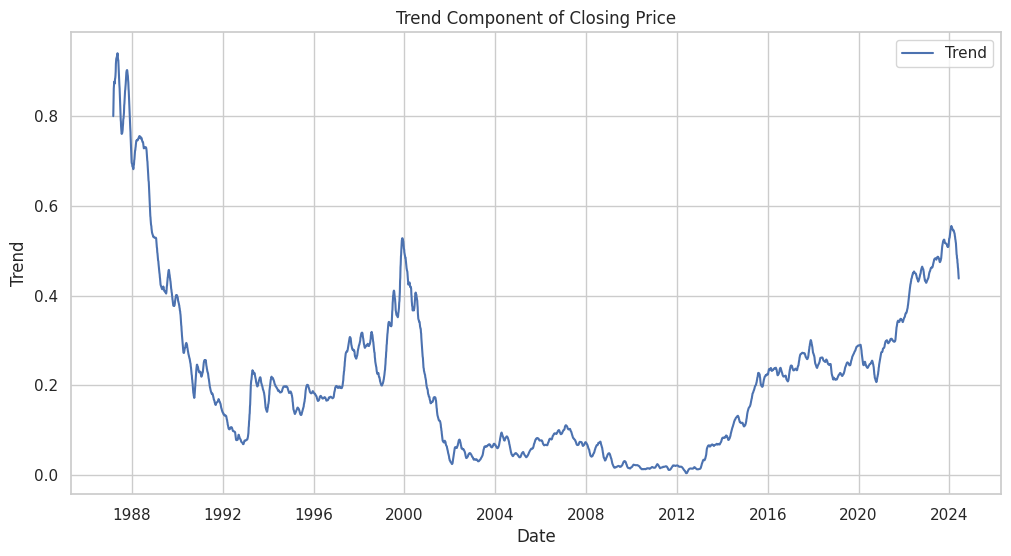

In [ ]:
df['trend'] = decomposition.trend

plt.figure(figsize=(12,6))
plt.plot(df.index, df['trend'], label='Trend')
plt.title('Trend Component of Closing Price')
plt.xlabel('Date')
plt.ylabel('Trend')
plt.legend()
plt.show()


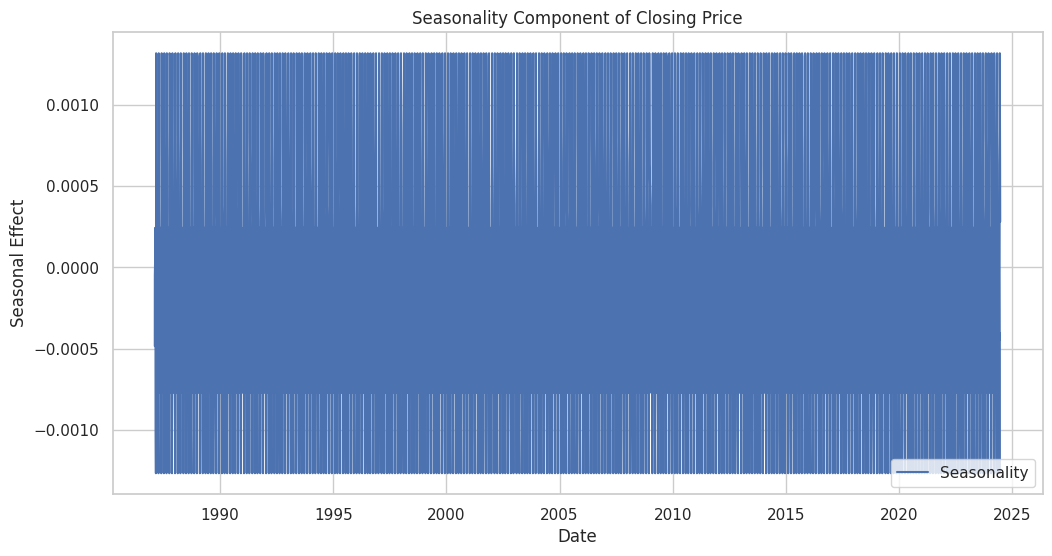

In [ ]:
df['seasonal'] = decomposition.seasonal

plt.figure(figsize=(12,6))
plt.plot(df.index, df['seasonal'], label='Seasonality')
plt.title('Seasonality Component of Closing Price')
plt.xlabel('Date')
plt.ylabel('Seasonal Effect')
plt.legend()
plt.show()


This graph focuses on the seasonality component of the closing price over time. The y-axis shows very small values (between -0.0010 and 0.0010), confirming that there is minimal seasonality in this time series. The pattern repeats consistently over the years, but its effect on the overall price is minimal.

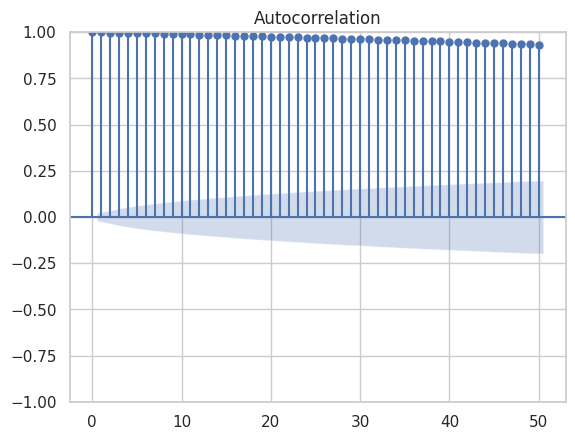

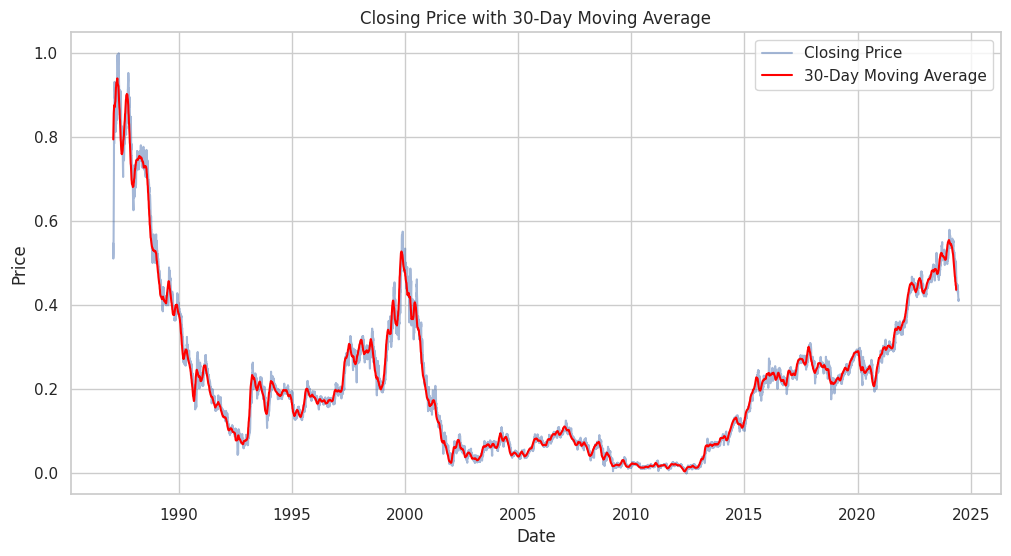

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

plot_acf(df['closing price'], lags=50)
plt.show()

df['moving_average_30'] = df['closing price'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['closing price'], label='Closing Price', alpha=0.5)
plt.plot(df.index, df['moving_average_30'], label='30-Day Moving Average', color='red')
plt.title('Closing Price with 30-Day Moving Average')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


Graph 1:

This is an autocorrelation plot. It shows how the time series is correlated with itself at different lag times. The blue bars represent the correlation coefficients, and the light blue shaded area likely represents the confidence interval. The strong correlations at lower lags that gradually decrease suggest that this time series has a strong autoregressive component.

Graph 2:

This graph displays the closing price (blue line) along with its 30-day moving average (red line). The two lines follow each other closely, with the moving average smoothing out some of the short-term fluctuations in the closing price. The overall trend shows periods of growth and decline, with a significant upward trend in recent years.

In [ ]:
print(df.dtypes)

date                 object
closing price       float64
opening price       float64
high price          float64
low price           float64
Volume               object
Rate of change %     object
dtype: object


# **LSTM**

In [ ]:
df['Rate of change %'] = pd.to_numeric(df['Rate of change %'].astype(str).str.replace('%', ''), errors='coerce')
def convert_volume(volume):
    if isinstance(volume, str):
        if 'M' in volume:
            return float(volume.replace('M', '')) * 1e6
        elif 'B' in volume:
            return float(volume.replace('B', '')) * 1e9
    return volume

df['Volume'] = df['Volume'].apply(convert_volume)


In [ ]:
print(df.columns)

Index(['date', 'closing price', 'opening price', 'high price', 'low price',
       'Volume', 'Rate of change %'],
      dtype='object')


In [ ]:
#df = df.drop(['lag_1', 'lag_2', 'lag_3', 'lag_4', 'lag_5'], axis=1)
df.head(5)

,date,closing price,opening price,high price,low price,Volume,Rate of change %
0,2024-08-01,156.3,159.3,159.4,156.1,79150000.0,-2.56
1,2024-07-31,160.4,158.2,160.7,158.1,173910000.0,1.07
2,2024-07-30,158.7,158.8,159.2,158.0,138140000.0,-0.63
3,2024-07-29,159.7,158.7,160.2,158.4,126280000.0,1.14
4,2024-07-26,157.9,159.3,159.6,157.9,155080000.0,-0.13


In [ ]:
from sklearn.preprocessing import MinMaxScaler
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])

df_scaled = df.copy()

In [ ]:
df_scaled.head(5) #Scaled & Normalized data

,date,closing price,opening price,high price,low price,Volume,Rate of change %
0,2024-08-01,0.451814,0.456286,0.452979,0.456018,0.054940,0.393030
1,2024-07-31,0.466838,0.452312,0.457645,0.463379,0.129515,0.510165
2,2024-07-30,0.460608,0.454480,0.452261,0.463011,0.101365,0.455308
3,2024-07-29,0.464273,0.454118,0.455851,0.464483,0.092031,0.512423
4,2024-07-26,0.457677,0.456286,0.453697,0.462643,0.114696,0.471442


In [ ]:
import numpy as np
from keras.models import Sequential
from keras.layers import LSTM, Dense

data = df['Rate of change %'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - loss: 0.0321
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0035
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 0.0038
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0035
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0034
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0036
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 14ms/step - loss: 0.0035
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step - loss: 0.0038
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - loss: 0.0037
Epoch 12/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 2s 10ms/step - loss: 0.0037
Epoch 13/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 0.0035
Epoch 14/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 0.0035
Epoch 15/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 10ms/step 

MSE value is pretty less so good performance by our model on the given datatset

In [ ]:
data = df['closing price'].values.reshape(-1, 1)
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

def create_sequences(data, seq_length):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data[i:i + seq_length])
        y.append(data[i + seq_length])
    return np.array(X), np.array(y)

seq_length = 10
X, y = create_sequences(scaled_data, seq_length)

split = int(len(X) * 0.8)
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(LSTM(50))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=50, batch_size=32)

predictions = model.predict(X_test)
predictions = scaler.inverse_transform(predictions)

from sklearn.metrics import mean_squared_error
mse = mean_squared_error(y_test, predictions)
print(f'Mean Squared Error: {mse}')

Epoch 1/50


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


230/230 ━━━━━━━━━━━━━━━━━━━━ 5s 11ms/step - loss: 0.0049
Epoch 2/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.3361e-04
Epoch 3/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 14ms/step - loss: 1.3711e-04
Epoch 4/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 15ms/step - loss: 1.3825e-04
Epoch 5/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - loss: 1.3288e-04
Epoch 6/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.1192e-04
Epoch 7/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 12ms/step - loss: 1.1230e-04
Epoch 8/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 1.0573e-04
Epoch 9/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0175e-04
Epoch 10/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0106e-04
Epoch 11/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 1.0093e-04
Epoch 12/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 13ms/step - loss: 8.5890e-05
Epoch 13/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 4s 16ms/step - loss: 7.5881e-05
Epoch 14/50
230/230 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - loss: 7.1059e-05
Ep

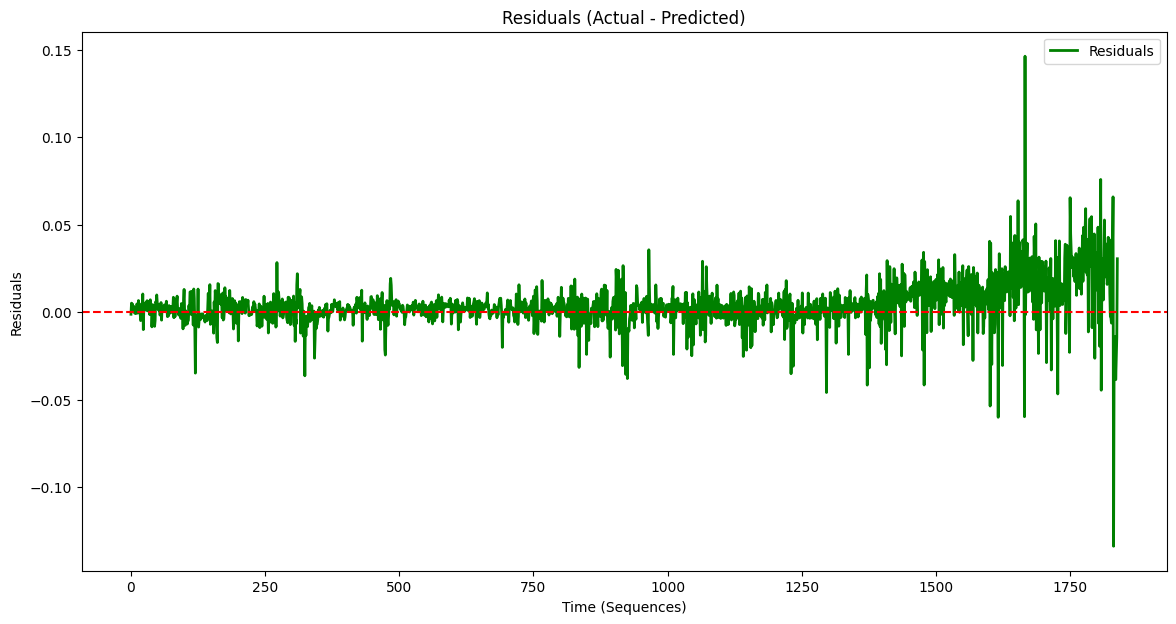

In [ ]:
residuals = results_df['Actual'] - results_df['Predicted']

plt.figure(figsize=(14, 7))
plt.plot(residuals, color='green', label='Residuals', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Residuals (Actual - Predicted)')
plt.xlabel('Time (Sequences)')
plt.ylabel('Residuals')
plt.legend()
plt.show()


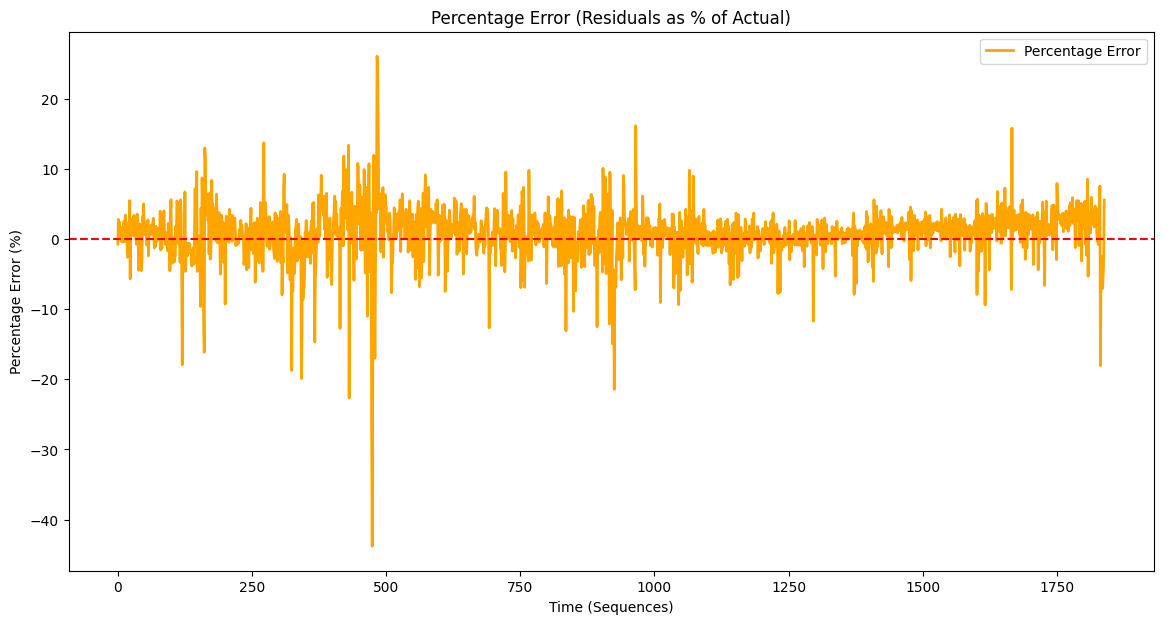

In [ ]:
percentage_error = (residuals / results_df['Actual']) * 100

plt.figure(figsize=(14, 7))
plt.plot(percentage_error, color='orange', label='Percentage Error', linewidth=2)
plt.axhline(y=0, color='r', linestyle='--')
plt.title('Percentage Error (Residuals as % of Actual)')
plt.xlabel('Time (Sequences)')
plt.ylabel('Percentage Error (%)')
plt.legend()
plt.show()


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Calculate metrics
mae = mean_absolute_error(results_df['Actual'], results_df['Predicted'])
mse = mean_squared_error(results_df['Actual'], results_df['Predicted'])
r2 = r2_score(results_df['Actual'], results_df['Predicted'])

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"R² Score: {r2}")


Mean Absolute Error (MAE): 0.008438563082049684
Mean Squared Error (MSE): 0.00018604782926421858
R² Score: 0.9971657323563001


Again, pretty good metric performance for closing price as our target variable by our LSTM model

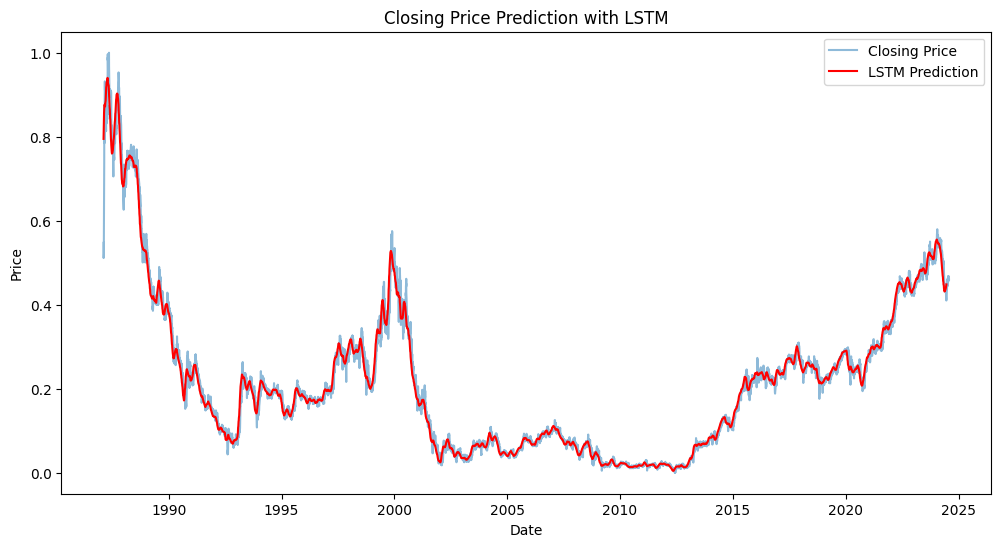

In [ ]:
df['lstm'] = df['closing price'].rolling(window=30).mean()

plt.figure(figsize=(12,6))
plt.plot(df.index, df['closing price'], label='Closing Price', alpha=0.5)
plt.plot(df.index, df['lstm'], label='LSTM Prediction', color='red')
plt.title('Closing Price Prediction with LSTM')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


We can see good predictions by the LSTM model on the actual target values capturing the intricacies and pattern in our data

# **Model Performance Summary**

The performance of the predictive model has been evaluated using several key metrics, providing insights into its accuracy and effectiveness in forecasting closing prices.

Mean Absolute Error (MAE): The MAE is approximately 0.0084, indicating that, on average, the model's predictions deviate from the actual closing prices by just 0.0084 units. This low value reflects the model's high level of accuracy in capturing the actual price movements.
    
Mean Squared Error (MSE): The MSE is calculated to be around 0.000186. This metric penalizes larger errors more than smaller ones, and a lower MSE suggests that the model maintains minimal squared deviations from the actual values.
    
R² Score: The R² score is approximately 0.9972, which signifies that the model explains about 99.72% of the variance in the closing prices. This indicates an excellent fit to the data, suggesting that the model captures the underlying patterns effectively.
    
Overall, the model demonstrates robust performance with minimal error metrics, suggesting it is well-suited for forecasting closing prices in the given dataset.

# **ARIMA**

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
result = adfuller(df['closing price'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: -1.641895059527491
p-value: 0.4612707414698998


In [ ]:
df['Differenced'] = df['closing price'].diff().dropna()


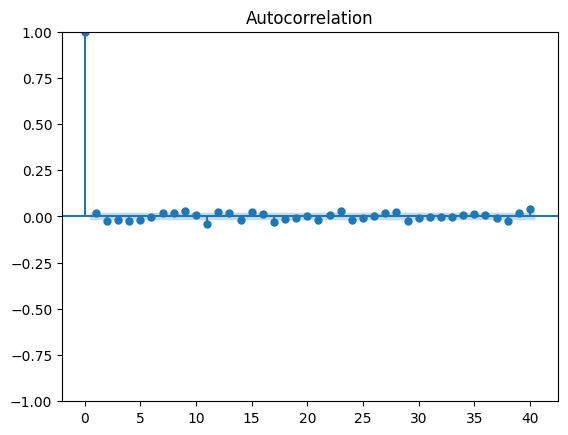

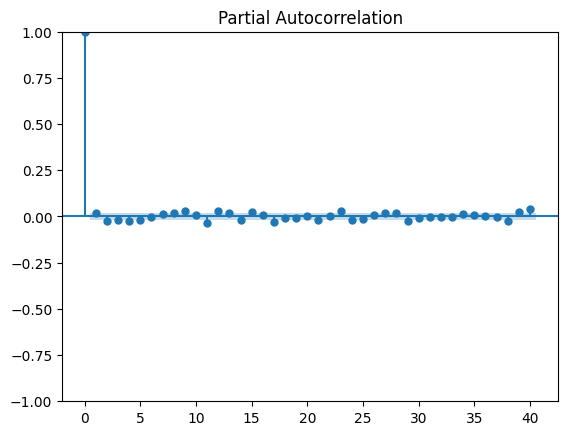

In [ ]:
plot_acf(df['Differenced'].dropna())
plot_pacf(df['Differenced'].dropna())
plt.show()

1.   Both ACF and PACF show strong correlation at lag 1, then drop sharply.

2.   No significant correlations at higher lags in either graph.

3.   No visible seasonality or complex patterns.

4.   Data likely follows a first-order autoregressive (AR(1)) process

5.   Suggests using an AR(1) or ARIMA(1,0,0) model for forecasting

6.   Past values beyond the immediately preceding one have little predictive power






In [ ]:
from statsmodels.tsa.arima.model import ARIMA
import itertools

p = range(0, 3)
d = [0, 1]
q = range(0, 3)

best_aic = float('inf')
best_order = None

# Perform grid search
for param in itertools.product(p, d, q):
    try:
        model = ARIMA(df['closing price'], order=param)
        results = model.fit()
        if results.aic < best_aic:
            best_aic = results.aic
            best_order = param
    except:
        continue

print(f'Best ARIMA{best_order} AIC: {best_aic}')

/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/statespace/sarimax.py:966: UserWarning: Non-stationary s

Best ARIMA(2, 1, 1) AIC: -64692.8662505036


In [ ]:
model = ARIMA(df['closing price'], order=(2, 1, 1))
model_fit = model.fit()
print(model_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          closing price   No. Observations:                 9202
Model:                 ARIMA(2, 1, 1)   Log Likelihood               32350.433
Date:                Thu, 10 Oct 2024   AIC                         -64692.866
Time:                        05:43:04   BIC                         -64664.358
Sample:                             0   HQIC                        -64683.176
                               - 9202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7964      0.065     12.267      0.000       0.669       0.924
ar.L2         -0.0386      0.003    -11.910      0.000      -0.045      -0.032
ma.L1         -0.7762      0.064    -12.087      0.0

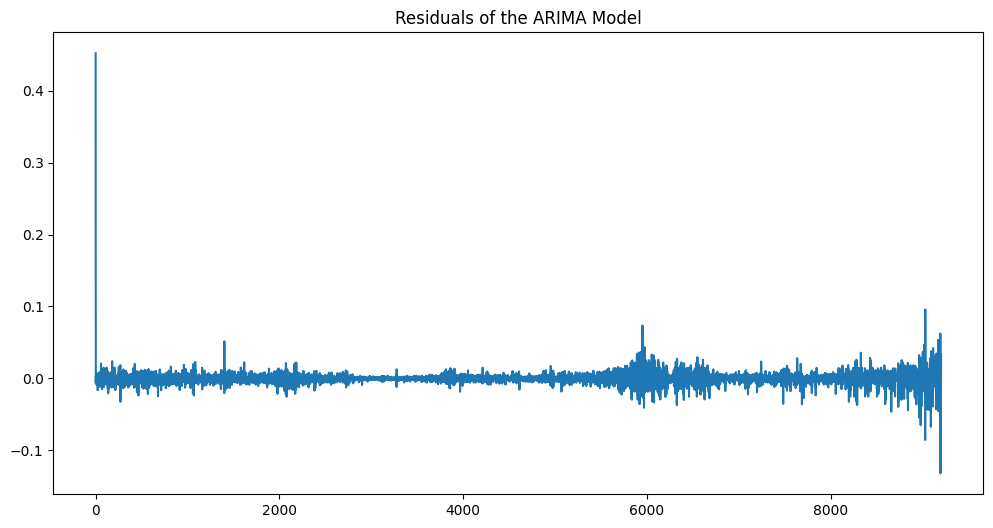

In [ ]:
residuals = model_fit.resid
plt.figure(figsize=(12, 6))
plt.plot(residuals)
plt.title('Residuals of the ARIMA Model')
plt.show()


In [ ]:
from statsmodels.stats.diagnostic import acorr_ljungbox

lb_test = acorr_ljungbox(residuals, lags=[10])
print('Ljung-Box Test p-value:', lb_test['lb_pvalue'].values[0])


Ljung-Box Test p-value: 0.21953044185800094


In [ ]:
df['date'] = pd.to_datetime(df['date'])

df.set_index('date', inplace=True)


In [ ]:
model = ARIMA(df['closing price'], order=(2, 1, 1))
model_fit = model.fit()

print(model_fit.summary())

print(df.isna().sum())

# Forecasting
try:
    forecast = model_fit.forecast(steps=10)
    print("Forecasted Values:", forecast)
except Exception as e:
    print("Forecasting Error:", e)

if pd.isna(forecast).any():
    print("Predicted Values contain NaN.")
else:
    print("Predicted Values are valid.")


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:          closing price   No. Observations:                 9202
Model:                 ARIMA(2, 1, 1)   Log Likelihood               32350.433
Date:                Thu, 10 Oct 2024   AIC                         -64692.866
Time:                        06:09:31   BIC                         -64664.358
Sample:                             0   HQIC                        -64683.176
                               - 9202                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7964      0.065     12.267      0.000       0.669       0.924
ar.L2         -0.0386      0.003    -11.910      0.000      -0.045      -0.032
ma.L1         -0.7762      0.064    -12.087      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
actual_values = df['closing price'][-10:]
predicted_values = forecast


In [ ]:
# Calculate the metrics
mae = mean_absolute_error(actual_values, predicted_values)
mse = mean_squared_error(actual_values, predicted_values)
r2 = r2_score(actual_values, predicted_values)

# Output the metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("R² Score:", r2)


Mean Absolute Error (MAE): 0.1020415165270844
Mean Squared Error (MSE): 0.02164074410850945
R² Score: -0.5022626936604904


In [ ]:
from statsmodels.tsa.stattools import adfuller

adf_result = adfuller(df['closing price'])
print('ADF Statistic:', adf_result[0])
print('p-value:', adf_result[1])


ADF Statistic: -1.641895059527491
p-value: 0.4612707414698998


In [ ]:
df['Diff'] = df['closing price'].diff()
df.dropna(inplace=True)


In [ ]:
df['Log_Closing_Price'] = np.log(df['closing price'])
df['Log_Diff'] = df['Log_Closing_Price'].diff()
df.dropna(inplace=True)


/usr/local/lib/python3.10/dist-packages/pandas/core/arraylike.py:399: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
adf_result_diff = adfuller(df['Diff'].dropna())
print('ADF Statistic after differencing:', adf_result_diff[0])
print('p-value after differencing:', adf_result_diff[1])


ADF Statistic after differencing: -15.765061915519105
p-value after differencing: 1.1791670883073798e-28


In [ ]:
from statsmodels.tsa.arima.model import ARIMA

model = ARIMA(df['closing price'], order=(2, 1, 1))
model_fit = model.fit()

# Print the summary of the model
print(model_fit.summary())


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsm

                               SARIMAX Results                                
Dep. Variable:          closing price   No. Observations:                 9199
Model:                 ARIMA(2, 1, 1)   Log Likelihood               32341.352
Date:                Thu, 10 Oct 2024   AIC                         -64674.704
Time:                        06:25:52   BIC                         -64646.197
Sample:                             0   HQIC                        -64665.014
                               - 9199                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7790      0.068     11.384      0.000       0.645       0.913
ar.L2         -0.0384      0.003    -11.821      0.000      -0.045      -0.032
ma.L1         -0.7587      0.068    -11.204      0.0

# **Final Thoughts**
So, based on our experimentation we can see that the performance of LSTM is better on our data than ARIMA model, due to the complexity of the dataset. ARIMA wasn't able to capture all the intricacies in the dataset as we would have wanted but LSTM due to its deep learning architecture was able to perform much better due to this ability to correctly idetify the pattern in our dataset and predicting the changes in prices over a period of time.

What else could we have done?

We could have experimented more with LSTM in terms of the number of layers, but I felt the main point was to show that LSTM is better performing which I did, if more time was alloted would have most definitely tried infusing RNN & LSTMS or used a LLM to analyse the time stamps of data better.